<a href="https://colab.research.google.com/github/wannasmile/colab_code_note/blob/main/CALCULUS02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Segment 1: Review of Introductory Calculus


In [1]:
import torch
import matplotlib.pyplot as plt

In [2]:
x = torch.tensor([0, 1, 2, 3, 4, 5, 6, 7.])
x

tensor([0., 1., 2., 3., 4., 5., 6., 7.])

The $y$ values were created using the equation of a line $y=mx+b$. 

This way, we know what the model parameters to be learned are, say, $m=-0.5$ and $b=2$. 

Random, normally-distributed noise has been added to simulate sampling error:


In [3]:
# y = -0.5*x + 2 + torch.normal(mean=torch.zeros(8), std=0.2)

For reproducibility of this demo, here's a fixed example of $y$ values obtained by running the commented-out line above:

In [4]:
y = torch.tensor([1.86, 1.31, .62, .33, .09, -.67, -1.23, -1.37])
y

tensor([ 1.8600,  1.3100,  0.6200,  0.3300,  0.0900, -0.6700, -1.2300, -1.3700])

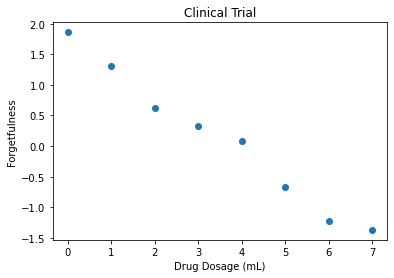

In [5]:
fig, ax = plt.subplots()
plt.title("Clinical Trial")
plt.xlabel("Drug Dosage (mL)")
plt.ylabel("Forgetfulness")
_ = ax.scatter(x, y)

In [6]:
m = torch.tensor([0.9]).requires_grad_()
m

tensor([0.9000], requires_grad=True)

In [7]:
b = torch.tensor([0.1]).requires_grad_()
b

tensor([0.1000], requires_grad=True)

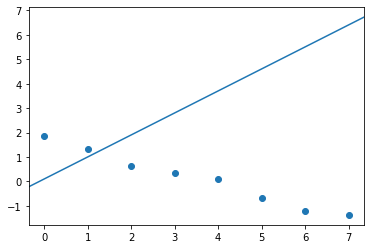

In [8]:
def regression(my_x, my_m, my_b):
    return my_m*my_x + my_b

def regression_plot(my_x, my_y, my_m, my_b):
    
    fig, ax = plt.subplots()

    ax.scatter(my_x, my_y)
    
    x_min, x_max = ax.get_xlim()
    y_min = regression(x_min, my_m, my_b).detach().item()
    y_max = regression(x_max, my_m, my_b).detach().item()
    
    ax.set_xlim([x_min, x_max])
    _ = ax.plot([x_min, x_max], [y_min, y_max])

regression_plot(x, y, m, b)

requires_grad是Pytorch中通用数据结构Tensor的一个属性，用于说明当前量是否需要在计算中保留对应的梯度信息。


**Step 1**: Forward pass

第一步：前向传播

In [9]:
import torch
import matplotlib.pyplot as plt

xs = torch.tensor([0, 1, 2, 3, 4, 5, 6, 7.])
ys = torch.tensor([1.86, 1.31, .62, .33, .09, -.67, -1.23, -1.37])
m = torch.tensor([0.9]).requires_grad_()
b = torch.tensor([0.1]).requires_grad_()

yhats = regression(xs, m, b)
yhats



tensor([0.1000, 1.0000, 1.9000, 2.8000, 3.7000, 4.6000, 5.5000, 6.4000],
       grad_fn=<AddBackward0>)

**Step 2**: Compare $\hat{y}$ with true $y$ to calculate cost $C$

第二步：计算预测值与真实值的差异$C$

Mean squared error:
$$C = \frac{1}{n} \sum_{i=1}^n (\hat{y_i}-y_i)^2 $$


(PyTorch `MSELoss` Method)


In [10]:
def mse(my_yhat, my_y): 
    sigma = torch.sum((my_yhat - my_y)**2)
    return sigma/len(my_y)

In [11]:
C = mse(yhats, ys)
C

tensor(19.6755, grad_fn=<DivBackward0>)

**Step 3**: Use autodiff to calculate gradient of $C$ w.r.t. parameters

第三步：使用autodiff计算差异$C$的梯度

In [12]:
C.backward()

In [13]:
m.grad

tensor([36.3050])

In [14]:
b.grad

tensor([6.2650])

**Step 4**: Gradient descent

第四步：进行梯度下降

In [15]:
optimizer = torch.optim.SGD([m, b], lr=0.01)

In [16]:
optimizer.step()

Confirm parameters have been adjusted sensibly:

In [17]:
m

tensor([0.5369], requires_grad=True)

In [18]:
b

tensor([0.0374], requires_grad=True)

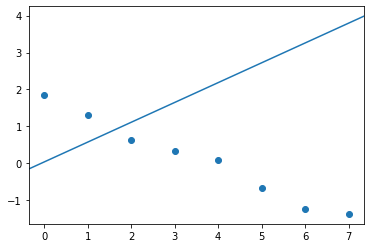

In [19]:
regression_plot(x, y, m, b)

We can repeat steps 1 and 2 to confirm cost has decreased:

In [20]:
C = mse(regression(x, m, b), y)
C

tensor(8.5722, grad_fn=<DivBackward0>)

Put the 4 steps in a loop to iteratively minimize cost toward zero:

In [21]:
epochs = 1000
for epoch in range(epochs):
    
    optimizer.zero_grad() # Reset gradients to zero ##把梯度置零
    
    yhat = regression(x, m, b) # Step 1 ##计算新参数下预测值
    C = mse(yhat, y) # Step 2 ##计算预测值与真实值差异
    
    C.backward() # Step 3 ##计算差异的梯度
    optimizer.step() # Step 4 ##优化器对参数值进行更新
    
    print('Epoch {}, cost {}, m grad {}, b grad {}'.format(epoch, '%.3g' % C.item(), '%.3g' % m.grad.item(), '%.3g' % b.grad.item()))

Epoch 0, cost 8.57, m grad 23.2, b grad 3.6
Epoch 1, cost 4.08, m grad 14.8, b grad 1.91
Epoch 2, cost 2.25, m grad 9.49, b grad 0.831
Epoch 3, cost 1.51, m grad 6.11, b grad 0.15
Epoch 4, cost 1.2, m grad 3.96, b grad -0.28
Epoch 5, cost 1.07, m grad 2.59, b grad -0.552
Epoch 6, cost 1.01, m grad 1.72, b grad -0.723
Epoch 7, cost 0.981, m grad 1.17, b grad -0.829
Epoch 8, cost 0.962, m grad 0.82, b grad -0.894
Epoch 9, cost 0.948, m grad 0.595, b grad -0.934
Epoch 10, cost 0.936, m grad 0.452, b grad -0.957
Epoch 11, cost 0.925, m grad 0.361, b grad -0.969
Epoch 12, cost 0.915, m grad 0.302, b grad -0.975
Epoch 13, cost 0.904, m grad 0.265, b grad -0.977
Epoch 14, cost 0.894, m grad 0.241, b grad -0.976
Epoch 15, cost 0.884, m grad 0.225, b grad -0.973
Epoch 16, cost 0.874, m grad 0.214, b grad -0.969
Epoch 17, cost 0.864, m grad 0.207, b grad -0.965
Epoch 18, cost 0.854, m grad 0.202, b grad -0.96
Epoch 19, cost 0.845, m grad 0.199, b grad -0.955
Epoch 20, cost 0.835, m grad 0.196, b

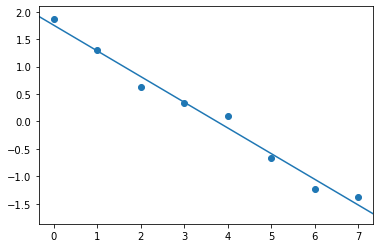

In [22]:
regression_plot(x, y, m, b)

In [23]:
m.item()

-0.4681258499622345

In [24]:
b.item()

1.7542961835861206

**N.B.**: The model doesn't perfectly approximate the slope (-0.5) and $y$-intercept (2.0) used to simulate the outcomes $y$ at the top of this notebook. This reflects the imperfectness of the sample of eight data points due to adding random noise during the simulation step. In the real world, the best solution would be to sample additional data points: The more data we sample, the more accurate our estimates of the true underlying parameters will be.

## Segment 2: Gradients Applied to Machine Learning



In [25]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import math # for constant pi

### Partial Derivatives of Multivariate Functions

Define a function $f(x, y)$ for $z = x^2 - y^2$: 

In [26]:
def f(my_x, my_y):
    return my_x**2 - my_y**2

Plot $z$ with respect to $x$ by varying $x$... 

In [27]:
xs = np.linspace(-3, 3, 1000)

...while holding $y$ constant (e.g., at $y = 0$):

In [28]:
zs_wrt_x = f(xs, 0)

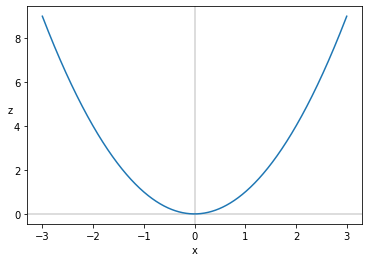

In [29]:
fig, ax = plt.subplots()
plt.axvline(x=0, color='lightgray')
plt.axhline(y=0, color='lightgray')

plt.xlabel('x')
plt.ylabel('z', rotation=0)
_ = ax.plot(xs, zs_wrt_x)

To determine the slope of $z$ w.r.t. $x$ at a given point along the curve, we can use the partial derivative: $$ \frac{\partial z}{\partial x} = 2x$$

In [30]:
def delz_delx(my_x, my_y): # y isn't relevant for *this* partial derivative
    return 2*my_x

In [31]:
x_samples = [-2, -1, 0, 1, 2]

In [32]:
colors = ['red', 'orange', 'green', 'blue', 'purple']

In [33]:
def point_and_tangent_wrt_x(my_xs, my_x, my_y, my_f, fprime, col):

    my_z = my_f(my_x, my_y) # z = f(x, y) 
    plt.scatter(my_x, my_z, c=col, zorder=3) 
    
    tangent_m = fprime(my_x, my_y) # Slope is partial derivative of f(x, y) w.r.t. x
    tangent_b = my_z - tangent_m*my_x # Line is z=mx+b, so b=z-mx
    tangent_line = tangent_m*my_xs + tangent_b
    
    plt.plot(my_xs, tangent_line, c=col, 
             linestyle='dashed', linewidth=0.7, zorder=3)

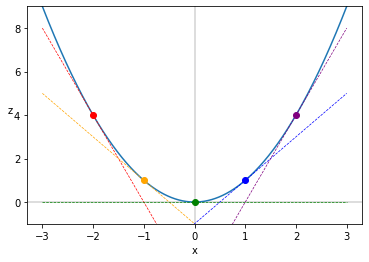

In [34]:
fig, ax = plt.subplots()
plt.axvline(x=0, color='lightgray')
plt.axhline(y=0, color='lightgray')

for i, x in enumerate(x_samples):
    point_and_tangent_wrt_x(xs, x, 0, f, delz_delx, colors[i])

plt.ylim(-1, 9)
plt.xlabel('x')
plt.ylabel('z', rotation=0)
_ = ax.plot(xs, zs_wrt_x)

Thereby visually demonstrating $\frac{\partial z}{\partial x} = 2x$. 

That is, the slope of $z$ along the $x$ axis is *twice* the $x$ value. 

Now let's plot $z$ with respect to $y$ by varying $y$...

In [35]:
ys = np.linspace(-3, 3, 1000)

...while holding $x$ constant (e.g., at $x$ = 0): 

In [36]:
zs_wrt_y = f(0, ys)

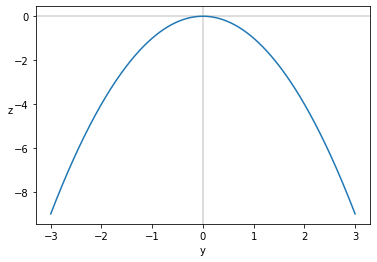

In [37]:
fig, ax = plt.subplots()
plt.axvline(x=0, color='lightgray')
plt.axhline(y=0, color='lightgray')

plt.xlabel('y')
plt.ylabel('z', rotation=0)
_ = ax.plot(ys, zs_wrt_y)

The partial derivative of $z$ w.r.t $y$ happens to be independent of $x$ (just as we observed $x$ is independent of $y$ above), so while $z$ varies as a function of both $x$ and $y$, the slope of $z$ w.r.t $y$ is the same no matter what $x$ is: $$ \frac{\partial z}{\partial y} = -2y $$

So for example, holding $x$ constant at 2 instead of 0 increases $z$, but has no impact whatsoever on the slope of $z$ w.r.t. $y$: 

In [38]:
zs_wrt_y = f(2, ys)

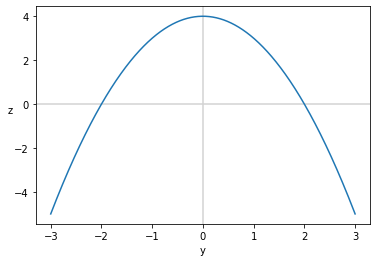

In [39]:
fig, ax = plt.subplots()
plt.axvline(x=0, color='lightgray')
plt.axhline(y=0, color='lightgray')

plt.xlabel('y')
plt.ylabel('z', rotation=0)
_ = ax.plot(ys, zs_wrt_y)

In [40]:
def delz_dely(my_x, my_y):
    return -2*my_y

In [41]:
y_samples = [-2, -1, 0, 1, 2]

In [42]:
def point_and_tangent_wrt_y(my_ys, my_x, my_y, my_f, fprime, col): # changed my_xs to my_ys

    my_z = my_f(my_x, my_y) 
    plt.scatter(my_y, my_z, c=col, zorder=3) # changed my_x to my_y
    
    tangent_m = fprime(my_x, my_y) 
    tangent_b = my_z - tangent_m*my_y # changed my_x to my_y
    tangent_line = tangent_m*my_ys + tangent_b # changed my_xs to my_ys
    
    plt.plot(my_ys, tangent_line, c=col, 
             linestyle='dashed', linewidth=0.7, zorder=3) # changed my_xs to my_ys

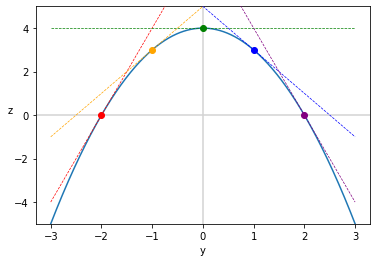

In [43]:
fig, ax = plt.subplots()
plt.axvline(x=0, color='lightgray')
plt.axhline(y=0, color='lightgray')

for i, y in enumerate(y_samples):
    point_and_tangent_wrt_y(ys, 2, y, f, delz_dely, colors[i])

plt.ylim(-5, 5)
plt.xlabel('y')
plt.ylabel('z', rotation=0)
_ = ax.plot(xs, zs_wrt_y)

Thereby visually demonstrating $\frac{\partial z}{\partial y} = -2y$. 

That is, the slope of $z$ along the $y$ axis is *twice* the $y$ value *and inverted*, resulting in the parabolic curve opening downward.

Determining partial derivatives by hand using rules is helpful for understanding how calculus works. In practice, however, autodiff enables us to do so more easily (especially if there are a large number of variables). For example, let's use the PyTorch automatic differentiation library to calculate the slope of $z$ with respect to both $x$ and $y$ at any given point $(x, y, z)$:

In [44]:
x = torch.tensor(0.).requires_grad_() 
x

tensor(0., requires_grad=True)

In [45]:
y = torch.tensor(0.).requires_grad_() 
y

tensor(0., requires_grad=True)

In [46]:
z = f(x, y) # Forward pass ##前向传播
z

tensor(0., grad_fn=<SubBackward0>)

In [47]:
z.backward() # Autodiff ##反向传播

As we already knew from our exercises above, the slope of the point (0, 0, 0) is zero with respect to both the $x$ and $y$ axes: 

In [48]:
x.grad

tensor(0.)

In [49]:
y.grad

tensor(-0.)

### Partial Derivatives of a Cylinder's Volume

The volume of a cylinder is described by $v = \pi r^2 l$ where: 

* $r$ is the radius of the cylinder
* $l$ is its length

In [50]:
def cylinder_vol(my_r, my_l):
    return math.pi * my_r**2 * my_l

In [51]:
# Let's say the radius is 3 meters and length is 5 meters:
r = torch.tensor(3.).requires_grad_()
print(r)

l = torch.tensor(5.).requires_grad_()
print(l)

tensor(3., requires_grad=True)
tensor(5., requires_grad=True)


In [52]:
# Then the volume of the cylinder is 141.4 cubic meters: 
v = cylinder_vol(r, l)
v

tensor(141.3717, grad_fn=<MulBackward0>)

In [53]:
v.backward()

In [54]:
l.grad

tensor(28.2743)

$$\frac{\partial v}{\partial l} = \pi r^2$$

In [55]:
math.pi * 3**2

28.274333882308138

This means that with $r = 3$, a change in $l$ by one unit corresponds to a change in $v$ of 28.27$\text{m}^3$. 

We can prove this to ourselves: 

In [56]:
cylinder_vol(3, 6)

169.64600329384882

In [57]:
cylinder_vol(3, 6) - cylinder_vol(3, 5)

28.274333882308127

In [58]:
cylinder_vol(3, 7) - cylinder_vol(3, 6)

28.274333882308156

For changes in $v$ with respect to $r$ we have the following: $$\frac{\partial v}{\partial r} = 2 \pi r l$$

In [59]:
r.grad

tensor(94.2478)

In [60]:
2 * math.pi * 3 * 5

94.24777960769379

$r$ is included in the partial derivative so adjusting it affects the scale of its impact on $v$. It is typical in calculus for the derivative only to apply at an infinitesimally small $\Delta r$. The smaller the $\Delta r$, the closer to the true $\frac{\partial v}{\partial r}$. E.g., at $\Delta r = 1 \times 10^{-6}$:

In [61]:
delta = 1e-6

In [62]:
# Dividing by delta restores scale
(cylinder_vol(3 + delta, 5) - cylinder_vol(3, 5)) / delta 

94.24779531741478

### Gradients of Cost w.r.t. Model Parameters

In this notebook, we calculate the gradient of quadratic cost with respect to a straight-line regression model's parameters. We keep the partial derivatives as simple as possible by limiting the model to handling a single data point.

In [63]:
import torch

In [64]:
xs = torch.tensor([0, 1, 2, 3, 4, 5, 6, 7.])

In [65]:
ys = torch.tensor([1.86, 1.31, .62, .33, .09, -.67, -1.23, -1.37])

The slope of a line is given by $y = mx + b$:

In [66]:
def regression(my_x, my_m, my_b):
    return my_m*my_x + my_b

Let's initialize $m$ and $b$ with the same "random" near-zero values:

In [67]:
m = torch.tensor([0.9]).requires_grad_()
b = torch.tensor([0.1]).requires_grad_()

To keep the partial derivatives as simple as possible, let's move forward with a single instance $i$ from the eight possible data points: 

In [68]:
i = 7
x = xs[i]
y = ys[i]

In [69]:
x

tensor(7.)

In [70]:
y

tensor(-1.3700)

**Step 1**: Forward pass

We can flow the scalar tensor $x$ through our regression model to produce $\hat{y}$, an estimate of $y$. Prior to any model training, this is an arbitrary estimate:

In [71]:
yhat = regression(x, m, b)
yhat

tensor([6.4000], grad_fn=<AddBackward0>)

**Step 2**: Compare $\hat{y}$ with true $y$ to calculate cost $C$

We used mean-squared error, which averages quadratic cost over multiple data points. With a single data point, here we can use quadratic cost alone. It is defined by: $$ C = (\hat{y} - y)^2 $$

In [72]:
def squared_error(my_yhat, my_y):
    return (my_yhat - my_y)**2

In [73]:
C = squared_error(yhat, y)
C

tensor([60.3729], grad_fn=<PowBackward0>)

**Step 3**: Use autodiff to calculate gradient of $C$ w.r.t. parameters

In [74]:
C.backward()

The partial derivative of $C$ with respect to $m$ ($\frac{\partial C}{\partial m}$) is: 

In [75]:
m.grad

tensor([108.7800])

And the partial derivative of $C$ with respect to $b$ ($\frac{\partial C}{\partial b}$) is: 

In [76]:
b.grad

tensor([15.5400])

$$ \frac{\partial C}{\partial m} = 2x(\hat{y} - y) $$

In [77]:
2*x*(yhat.item()-y)

tensor(108.7800)

$$ \frac{\partial C}{\partial b} = 2(\hat{y}-y) $$

In [78]:
2*(yhat.item()-y)

tensor(15.5400)

### The Gradient of Cost $\nabla C$

The gradient of cost, which is symbolized $\nabla C$ (pronounced "nabla C"), is a vector of all the partial derivatives of $C$ with respect to each of the individual model parameters: 

$\nabla C = \nabla_p C = \left[ \frac{\partial{C}}{\partial{p_1}}, \frac{\partial{C}}{\partial{p_2}}, \cdots, \frac{\partial{C}}{\partial{p_n}} \right]^T $

In this case, there are only two parameters, $b$ and $m$: 

$\nabla C = \left[ \frac{\partial{C}}{\partial{b}}, \frac{\partial{C}}{\partial{m}} \right]^T $

In [79]:
gradient = torch.tensor([[b.grad.item(), m.grad.item()]]).T
gradient

tensor([[ 15.5400],
        [108.7800]])

### Gradient of Cost on a Batch of Data

* Calculate the gradient of mean squared error on a batch of data
* Visualize gradient descent in action

In [80]:
import torch
import matplotlib.pyplot as plt

xs = torch.tensor([0, 1, 2, 3, 4, 5, 6, 7.])
ys = torch.tensor([1.86, 1.31, .62, .33, .09, -.67, -1.23, -1.37])

def regression(my_x, my_m, my_b):
    return my_m*my_x + my_b

m = torch.tensor([0.9]).requires_grad_()
b = torch.tensor([0.1]).requires_grad_()



**Step 1**: Forward pass

In [81]:
yhats = regression(xs, m, b)
yhats

tensor([0.1000, 1.0000, 1.9000, 2.8000, 3.7000, 4.6000, 5.5000, 6.4000],
       grad_fn=<AddBackward0>)

**Step 2**: Compare $\hat{y}$ with true $y$ to calculate cost $C$

Let's use mean squared error, which averages quadratic cost across multiple data points: $$C = \frac{1}{n} \sum_{i=1}^n (\hat{y_i}-y_i)^2 $$

In [82]:
def mse(my_yhat, my_y): 
    sigma = torch.sum((my_yhat - my_y)**2)
    return sigma/len(my_y)

C = mse(yhats, ys)
C

tensor(19.6755, grad_fn=<DivBackward0>)

**Step 3**: Use autodiff to calculate gradient of $C$ w.r.t. parameters

In [83]:
C.backward()

In [84]:
m.grad

tensor([36.3050])

In [85]:
b.grad

tensor([6.2650])

$$ \frac{\partial C}{\partial m} = \frac{2}{n} \sum (\hat{y}_i - y_i) \cdot x_i $$

In [86]:
2*1/len(ys)*torch.sum((yhats - ys)*xs)

tensor(36.3050, grad_fn=<MulBackward0>)

$$ \frac{\partial C}{\partial b} = \frac{2}{n} \sum (\hat{y}_i - y_i) $$

In [87]:
2*1/len(ys)*torch.sum(yhats - ys)

tensor(6.2650, grad_fn=<MulBackward0>)

We don't need to explicitly create a standalone $\nabla C$ object to run, but let's create it for fun now anyway and we'll make use of it in a later: 

In [88]:
gradient = torch.tensor([[b.grad.item(), m.grad.item()]]).T
gradient

tensor([[ 6.2650],
        [36.3050]])

Let's visualize the most pertinent metrics in a single plot:

In [89]:
def labeled_regression_plot(my_x, my_y, my_m, my_b, my_C, include_grad=True):
    
    title = 'Cost = {}'.format('%.3g' % my_C.item())
    if include_grad:
        xlabel = 'm = {}, m grad = {}'.format('%.3g' % my_m.item(), '%.3g' % my_m.grad.item())
        ylabel = 'b = {}, b grad = {}'.format('%.3g' % my_b.item(), '%.3g' % my_b.grad.item())
    else:
        xlabel = 'm = {}'.format('%.3g' % my_m.item())        
        ylabel = 'b = {}'.format('%.3g' % my_b.item())
    
    fig, ax = plt.subplots()
    
    plt.title(title)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)

    ax.scatter(my_x, my_y, zorder=3)
    
    x_min, x_max = ax.get_xlim()
    y_min = regression(x_min, my_m, my_b).detach().item()
    y_max = regression(x_max, my_m, my_b).detach().item()

    ax.set_xlim([x_min, x_max])
    _ = ax.plot([x_min, x_max], [y_min, y_max], c='C01')

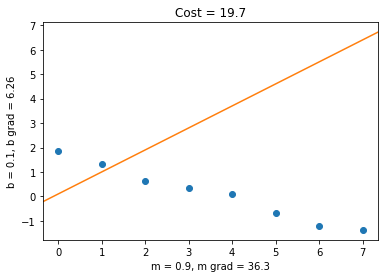

In [90]:
labeled_regression_plot(xs, ys, m, b, C)

**Step 4**: Gradient descent

$\frac{\partial C}{\partial m} = 36.3$ indicates that an increase in $m$ corresponds to a large increase in $C$. 

Meanwhile, $\frac{\partial C}{\partial b} = 6.26$ indicates that an increase in $b$ also corresponds to an increase in $C$, though much less so than $m$.

In the first round of training, the lowest hanging fruit with respect to reducing cost $C$ is therefore to decrease the slope of the regression line, $m$. There will also be a relatively small decrease in the $y$-intercept of the line, $b$. 

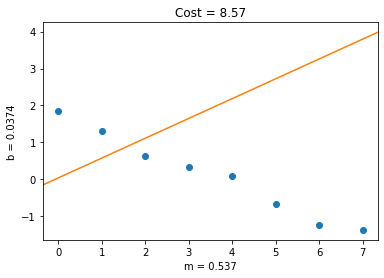

In [91]:
optimizer = torch.optim.SGD([m, b], lr=0.01)

optimizer.step()

C = mse(regression(xs, m, b), ys)

labeled_regression_plot(xs, ys, m, b, C, include_grad=False) # Gradient of C hasn't been recalculated

### Rinse and Repeat

Observe further rounds of training: 

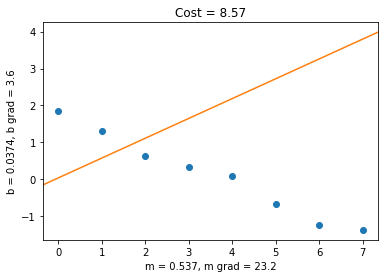

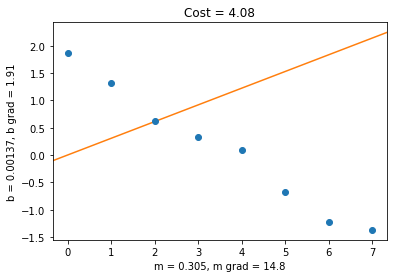

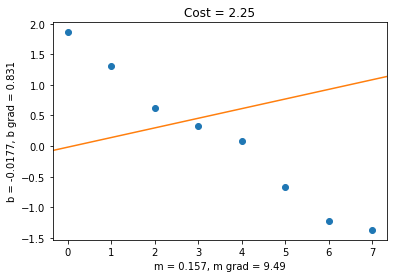

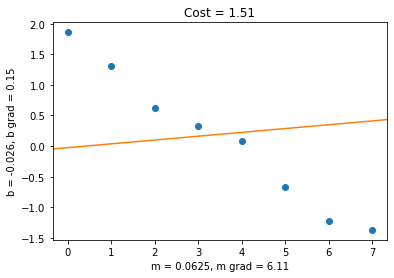

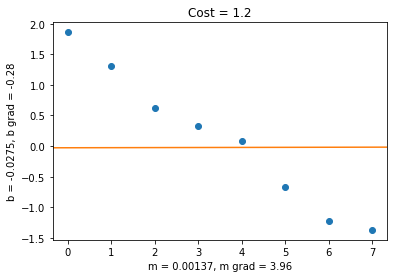

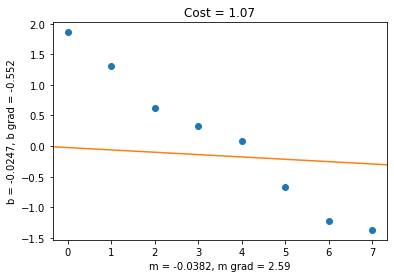

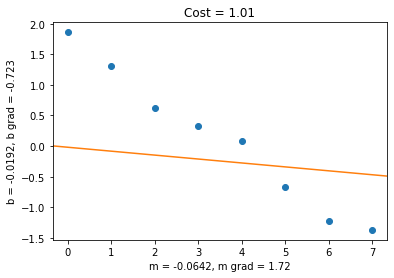

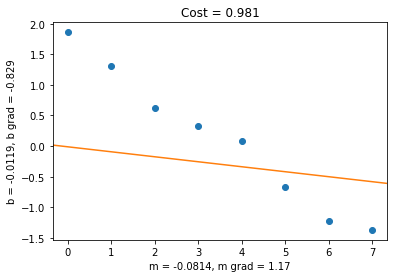

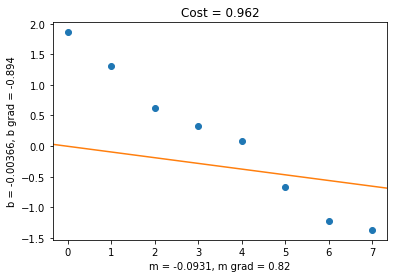

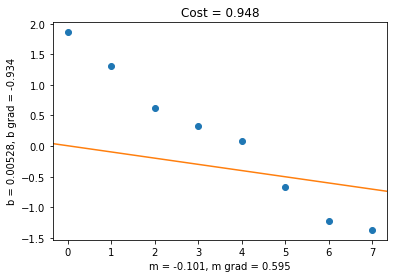

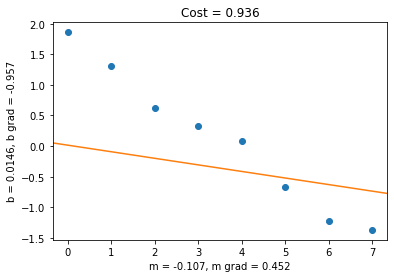

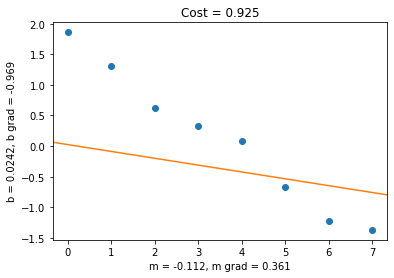

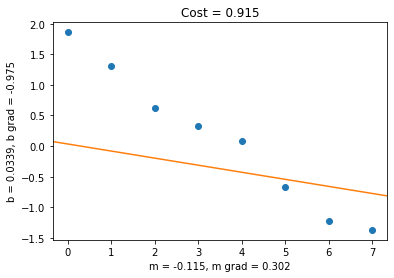

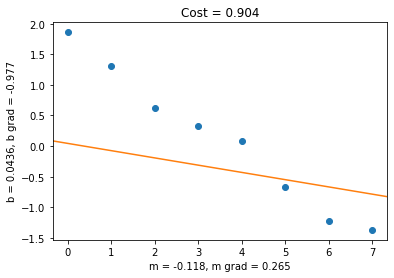

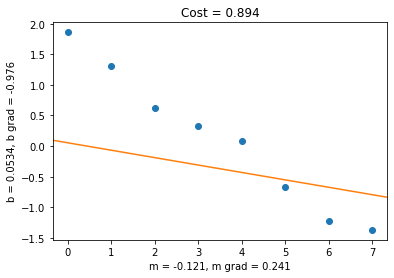

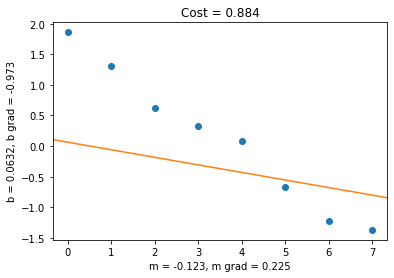

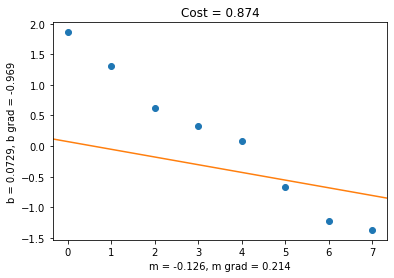

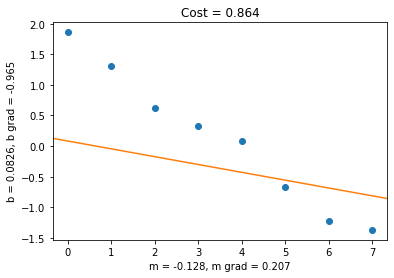

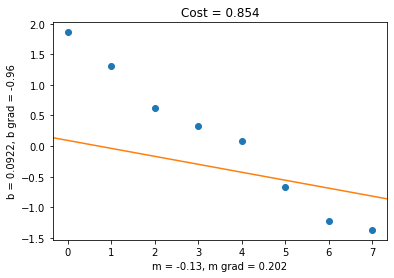

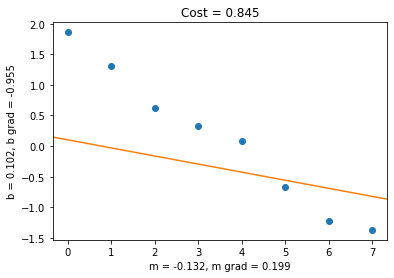

In [92]:
epochs = 20
for epoch in range(epochs): 
    
    optimizer.zero_grad() # Reset gradients to zero
    
    yhats = regression(xs, m, b) # Step 1
    C = mse(yhats, ys) # Step 2
    
    C.backward() # Step 3
    
    labeled_regression_plot(xs, ys, m, b, C)
    
    optimizer.step() # Step 4

In later rounds of training, after the model's slope $m$ has become closer to the slope represented by the data, $\frac{\partial C}{\partial b}$ becomes negative, indicating an inverse relationship between $b$ and $C$. Meanwhile, $\frac{\partial C}{\partial m}$ remains positive. 

This combination directs gradient descent to simultaneously adjust the $y$-intercept $b$ upwards and the slope $m$ downwards in order to reduce cost $C$ and, ultimately, fit the regression line snugly to the data.

## Segment 3: Integrals

In [93]:
from scipy.integrate import quad # "quadrature" = numerical integration (as opposed to symbolic)

$$ \int_1^2 \frac{x}{2} dx = \frac{3}{4} $$

In [94]:
def g(x):
    return x/2

In [95]:
quad(g, 1, 2) 

(0.75, 8.326672684688674e-15)

The second output of `quad` is an estimate of the absolute error of the integral, which in this case is essentially zero.

In [96]:
def h(x):
    return 2*x

In [97]:
quad(h, 3, 4)

(7.0, 7.771561172376096e-14)

In [98]:
### Area Under the ROC Curve

When we don't have a function but we do have $(x, y)$ coordinates, we can use the scikit-learn library's `auc()` method, which uses a numerical approach (the trapezoidal rule) to find the area under the curve described by the coordinates: 

In [99]:
from sklearn.metrics import auc

The $(x, y)$ coordinates of our hot dog-detecting ROC curve are: 

* (0, 0)
* (0, 0.5)
* (0.5, 0.5)
* (0.5, 1)
* (1, 1)

In [100]:
xs = [0, 0,   0.5, 0.5, 1]
ys = [0, 0.5, 0.5, 1,   1]

In [101]:
auc(xs, ys)

0.75